In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins

df_dlist = pd.read_csv('research/listings.csv.gz')
#dropping a row with corrupted data
df_dlist = df_dlist[df_dlist.id != 18476572]

df_list = pd.read_csv('research/listings.csv')

df_cal = pd.read_csv('research/calendar.csv.gz')

df_rv = pd.read_csv('research/reviews.csv.gz')

df_nei = pd.read_csv('research/neighbourhoods.csv')

table = [df_dlist,df_list,df_cal,df_rv,df_nei]


In [3]:
for n in table:
    print('\n' ,n.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 2623
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 2.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2624 non-null   int64  
 1   name                            2624 non-null   object 
 2   host_id                         2624 non-null   int64  
 3   host_name                       2623 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2624 non-null   object 
 6   latitude                        2624 non-null   float64
 7   longitude                       2624 non-null   float64
 8   room_type                       2624 non-null   object 
 9   price                    

In [4]:
dlist_c = list(df_dlist.columns)
# for i, v in enumerate(dlist_c):
#     out = f'{i} : {v}'
#     print (out)

In [5]:
#k,v pairs
# testdata = df_dlist.host_identity_verified
# unique, counts = np.unique(testdata, return_counts=True)
# dict(zip(unique,counts))

# testdata2 = df_dlist.host_is_superhost
# unique2, counts2 = np.unique(testdata2, return_counts=True)
# dict(zip(unique2,counts2))

# testdata3 = df_dlist.square_feet
# unique3, counts3 = np.unique(testdata3, return_counts=True)
# dict(zip(unique3,counts3))


In [6]:
#check if super host has to verify
super_veri = df_dlist[(df_dlist['host_identity_verified'] == 'f') & (df_dlist['host_is_superhost'] == 't')]
# super_veri.loc[:,['host_identity_verified','host_is_superhost']]

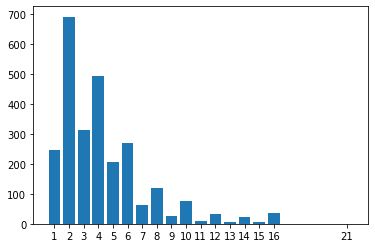

In [7]:
#most common accommodations
df_acc = df_dlist.groupby('accommodates')['accommodates'].count().sort_values(ascending=False)


fig, ax = plt.subplots()
ax.bar(df_acc.index,df_acc)
ax.set_xticks(df_acc.index)
plt.show()

In [8]:
#price distribution
prices = df_list['price']
prices.describe()

count    2624.000000
mean      139.698171
std       134.607059
min        15.000000
25%        60.000000
50%       109.000000
75%       175.000000
max      2000.000000
Name: price, dtype: float64

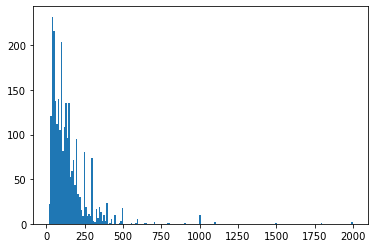

In [9]:
prices.hist(bins=200,grid=False)

In [11]:
most_exp = df_list.max(axis=0)

least_exp = df_list.min(axis=0)

print(most_exp,'\n \n',least_exp)

id                                                                   43593556
name                                         시티와 가까운 럭셔리 콘도에서 1달 사실 여성분 구합니다.
host_id                                                             345006093
neighbourhood_group                                                       NaN
neighbourhood                     Ward F (councilmember Jermaine D. Robinson)
latitude                                                              40.7609
longitude                                                            -74.0299
room_type                                                         Shared room
price                                                                    2000
minimum_nights                                                            365
number_of_reviews                                                         467
reviews_per_month                                                        8.23
calculated_host_listings_count                                  

In [12]:
#location heatmap
map_test = folium.Map(location=[40.72613,-74.048110],
                      tiles = 'Stamen Terrain',
                     zoom_start = 13)



#add measure control
from folium.plugins import MeasureControl
map_test.add_child(MeasureControl())



#gabe
from folium.plugins import FloatImage
url = 'https://s3-us-west-1.amazonaws.com/companies.comparably.com/31512/ceo_v1.jpg'
FloatImage(url, bottom=5, left=70).add_to(map_test)


folium.Marker([most_exp[5],most_exp[6]], popup=most_exp[1]).add_to(map_test)
folium.Marker([least_exp[5],least_exp[6]], popup=least_exp[1]).add_to(map_test)


#heatmap
from folium.plugins import HeatMap
geo_loc = df_list.iloc[:,6:8]
heat_data = [[row['latitude'],row['longitude']] for dex, row in geo_loc.iterrows()]
HeatMap(heat_data, radius=15,blur=15).add_to(map_test)



map_test

In [15]:
import seaborn as sns
df_num = df_dlist[['price','accommodates','host_listings_count','bathrooms',
                   'bedrooms','beds','security_deposit','cleaning_fee',
                   'guests_included','extra_people','minimum_nights','maximum_nights',
                   'number_of_reviews','number_of_reviews_ltm']]

#clean the dataset
#create the df with numeric value only columns
df_num['price'] = df_num['price'].apply(lambda x: numericalize(x))
df_num['security_deposit'] = df_num['security_deposit'].apply(lambda x: numericalize(x))
df_num['cleaning_fee'] = df_num['cleaning_fee'].apply(lambda x: numericalize(x))
df_num['extra_people'] = df_num['extra_people'].apply(lambda x: numericalize(x))

df_num.fillna(0)


df_num.corr()


#g_num = sns.pairplot(df_num)

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,price,accommodates,host_listings_count,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm
price,1.000000,0.394357,0.128009,0.243361,0.278251,0.349960,0.165291,0.517476,0.347254,0.098165,0.087633,0.111110,-0.096664,-0.074366
accommodates,0.394357,1.000000,-0.052292,0.362566,0.683060,0.880285,0.116939,0.545743,0.638332,0.095300,0.056132,-0.045242,0.132559,0.214738
host_listings_count,0.128009,-0.052292,1.000000,-0.014270,-0.091315,-0.065865,-0.047036,0.246043,-0.054587,-0.163073,0.058190,0.231518,-0.162567,-0.189478
bathrooms,0.243361,0.362566,-0.014270,1.000000,0.529168,0.369624,0.037645,0.194178,0.282502,0.022636,0.111102,0.042592,-0.010892,0.037010
bedrooms,0.278251,0.683060,-0.091315,0.529168,1.000000,0.675252,0.079405,0.389539,0.476398,0.086898,0.121855,-0.001416,0.026804,0.079670
beds,0.349960,0.880285,-0.065865,0.369624,0.675252,1.000000,0.133672,0.482547,0.623021,0.112936,0.054534,-0.047460,0.098606,0.177534
security_deposit,0.165291,0.116939,-0.047036,0.037645,0.079405,0.133672,1.000000,0.182275,0.097721,0.173396,0.042113,-0.117184,-0.003389,-0.019403
cleaning_fee,0.517476,0.545743,0.246043,0.194178,0.389539,0.482547,0.182275,1.000000,0.458471,0.028762,0.268953,0.103738,-0.137842,-0.099621
guests_included,0.347254,0.638332,-0.054587,0.282502,0.476398,0.623021,0.097721,0.458471,1.000000,0.272911,0.185208,0.004145,0.105145,0.188620
extra_people,0.098165,0.095300,-0.163073,0.022636,0.086898,0.112936,0.173396,0.028762,0.272911,1.000000,-0.060892,-0.037213,0.051934,0.078145


In [471]:
g_num.savefig('scatter_matrix_num.png')

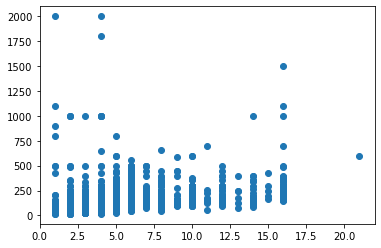

In [16]:
plt.scatter(df_num['accommodates'],df_num['price'])

In [17]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 2623
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  2623 non-null   float64
 1   accommodates           2623 non-null   int64  
 2   host_listings_count    2623 non-null   float64
 3   bathrooms              2622 non-null   float64
 4   bedrooms               2615 non-null   float64
 5   beds                   2608 non-null   float64
 6   security_deposit       2129 non-null   float64
 7   cleaning_fee           2404 non-null   float64
 8   guests_included        2623 non-null   int64  
 9   extra_people           2623 non-null   float64
 10  minimum_nights         2623 non-null   int64  
 11  maximum_nights         2623 non-null   int64  
 12  number_of_reviews      2623 non-null   int64  
 13  number_of_reviews_ltm  2623 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 307.4 KB


In [21]:
#test my functions here
df_num_ = df_num.copy()

df_num_['price'] = df_num_['price'].apply(lambda x: numericalize(x))

df_num_['price']

0       None
1       None
2       None
3       None
4       None
        ... 
2619    None
2620    None
2621    None
2622    None
2623    None
Name: price, Length: 2623, dtype: object

In [14]:
#check how many nan values are in a col
def check_na(col_name,df):
    return sum(df[col_name].isna())


#turn dollars(prices) to 
def numericalize(string):
    if type(string) != str:
        pass
    else:
        num = ''
        for char in list(string):
            if char.isnumeric() or char == '.':
                num += char
        return float(num)